# Desafio 1: Properti

## Objetivos:
-  Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.

-  Realizar un análisis descriptivo de las principales variables.

- Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

## Preparacion de ambiente
### Importar Librerias
**Numpy** y **Pandas** son importadas para administrar todas las operaciones analiticas 

**IPython** es utilizados para administrar la visualizacion de los datos

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

### Importar archivo CSV
Utilizando Pandas importamos el archivo CSV considerando la comma como delimitador 

In [2]:
dfprop=pd.read_csv(filepath_or_buffer='properatti.csv',delimiter=',',index_col = 0 )

## Visualizacion
### Visualizar la forma del Dataframe
Se utilizara la funcion nativa **shape** de la clase DataFrame para visualizar:
- Cantidad de observaciones 
- Cantidad de variables

In [3]:
dfprop.shape

(121220, 25)

### Visualizar estructura del Dataframe
Se utilizara la funcion nativa **info()** de la clase DataFrame para visualizar:
- Cantidad de variables
- Nombre de variables
- Cantidad de registros con valores **No nulos**
- Tipo de dato

In [4]:
dfprop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 non-null float64
price_usd_per_m2              68617 n

## Visualizacion de valores Nan en cada variable

Visualizamos la cantidad de valores Nan para cada variable  

In [5]:
dfprop[dfprop.isnull().any(axis=1)].isna().sum()

operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

## Limpieza de datos
### Eliminacion de inmuebles sin valor analitico

Eliminamos los inmuebles sin precio ni ubicaciones, ya que no tenemos ninguna forma de estimar un precio.

Condicion:
- price == Nan
- price_aprox_local_currency == Nan
- price_aprox_usd == Nan
- surface_total_in_m2 == Nan
- surface_covered_in_m2 == Nan


Los registros eliminados son 4733 

In [6]:
# Generamos una mascara para encontrar todos los registros bajo esta condicion
dfprop_withoutprice_withoutsurface=((dfprop['price'].isna()==True)\
                                    &(dfprop['price_aprox_local_currency'].isna()==True)\
                                    &(dfprop['price_aprox_usd'].isna()==True)\
                                    &(dfprop['surface_total_in_m2'].isna()==True)\
                                    &(dfprop['surface_covered_in_m2'].isna()==True))

# Instanciamos el Dataframe excluyendo los registros que no cumple con dicha condicion
dfprop=dfprop.loc[~dfprop_withoutprice_withoutsurface]
dfprop

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
5,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,-58.519828,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bop_venta_depart...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...
6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,...,78.0,1226.415094,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
9,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,-60.725919,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15box_venta_casa_r...,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO,https://th

Visualizamos la forma para confirmar que se hayan eliminado los registros

In [7]:
dfprop.shape

(116487, 25)

### Marcar con variable dummy los inmuebles cuya concentracion por provincia sea menor a 30 operaciones 

In [8]:
# Hacer codigo 

# Imputacion
## Variable place_name - valores Nan:  
- Analizamos los valores NaN de la columna 'place_name':

In [9]:
dfprop.loc[(dfprop['place_name'].isna() == True),['place_name','place_with_parent_names']]

,place_name,place_with_parent_names
6489,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
10201,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
11451,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
14839,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
18622,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
21922,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
23664,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
24722,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
38856,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
45970,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||


- Vemos que, de acuerdo a 'place_name_with_parents', todos los valores faltantes son 'Tigre'.
- Por lo tanto, procedemos a reemplazarlos:

In [10]:
dfprop['place_name'].fillna( value = 'Tigre', inplace = True)

Volvemos a visualizar la cantidad de valores nulos para confirmar que no haya mas valores **Nan** en la variable 'place_name'

In [11]:
dfprop[dfprop.isnull().any(axis=1)].isna().sum()

operation                          0
property_type                      0
place_name                         0
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18529
lat-lon                        50398
lat                            50398
lon                            50398
price                          15677
currency                       15678
price_aprox_local_currency     15677
price_aprox_usd                15677
surface_total_in_m2            34595
surface_covered_in_m2          15174
price_usd_per_m2               47870
price_per_m2                   28829
floor                         108892
rooms                          71444
expenses                      102275
properati_url                      0
description                        2
title                              0
image_thumbnail                 2864
dtype: int64

## Variables 'surface_total_in_m2' y 'surface_covered_in_m2' - valores Nan
Analizamos los valores que tienen 'surface_covered_in_m2', pero no 'surface_total_in_m2'

In [12]:
dfprop_surfaceanalysis = dfprop[(dfprop['surface_total_in_m2'].isna() == True) & (dfprop['surface_covered_in_m2'].isna() == False)]
dfprop_surfaceanalysis[['surface_total_in_m2', 'surface_covered_in_m2']].head()

,surface_total_in_m2,surface_covered_in_m2
68,NaN,72.0
77,NaN,85.0
79,NaN,42.0
87,NaN,170.0
89,NaN,53.0


Reemplazamos los valores NaN de la columna 'surface_total_in_m2', asumiendo que en estos casos es igual al valor de 'surface_covered_in_m2'

In [13]:
dfprop.fillna({'surface_total_in_m2' : dfprop['surface_covered_in_m2']}, inplace = True)

Volvemos a constatar la cantidad de valores nulos en el dataframe:

In [14]:
dfprop[dfprop.isnull().any(axis=1)].isna().sum()

operation                          0
property_type                      0
place_name                         0
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18529
lat-lon                        50398
lat                            50398
lon                            50398
price                          15677
currency                       15678
price_aprox_local_currency     15677
price_aprox_usd                15677
surface_total_in_m2             7636
surface_covered_in_m2          15174
price_usd_per_m2               47870
price_per_m2                   28829
floor                         108892
rooms                          71444
expenses                      102275
properati_url                      0
description                        2
title                              0
image_thumbnail                 2864
dtype: int64

Repetimos la operación para los casos en los que no tenemos valor de 'surface_covered_in_m2', completando con el valor de 'surface_total_in_m2':

In [15]:
dfprop_surfaceanalysis = dfprop[(dfprop['surface_covered_in_m2'].isna() == True) & (dfprop['surface_total_in_m2'].isna() == False)]
dfprop_surfaceanalysis[['surface_total_in_m2', 'surface_covered_in_m2']].head()

,surface_total_in_m2,surface_covered_in_m2
5,53.0,NaN
10,1514.0,NaN
15,164.0,NaN
66,38.0,NaN
67,220.0,NaN


In [16]:
dfprop.fillna({'surface_covered_in_m2' : dfprop['surface_total_in_m2']}, inplace = True)

In [17]:
dfprop[dfprop.isnull().any(axis=1)].isna().sum()

operation                          0
property_type                      0
place_name                         0
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18529
lat-lon                        50398
lat                            50398
lon                            50398
price                          15677
currency                       15678
price_aprox_local_currency     15677
price_aprox_usd                15677
surface_total_in_m2             7636
surface_covered_in_m2           7636
price_usd_per_m2               47870
price_per_m2                   28829
floor                         108892
rooms                          71444
expenses                      102275
properati_url                      0
description                        2
title                              0
image_thumbnail                 2864
dtype: int64

### Variable  'state_name' vs 'place_with_parent_names'
Notamos que la columna **'place_name'** contiene valores que aportan una clara referencia de la ubicacion geografica del inmueble.

Por ejemplo
- place_name: 'Centro'
- place_with_parent_names: '|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|'

Adicionalmente, los valores contenidos por esta columna no tienen el mismo valor referencial, lo cual difculta entender la precision de dicha columna. 

Por ello utilizamos **'place_with_parent_names'** que nos permite definir correctamente la ubicacion geografica del inmueble. 

Por lo tanto, separamos el texto y generaremos una nueva columna quedando el set con esta estructura.

- country_name: Pais
- state_name: provincia (salvo buenos aires que indicara la zona
- district_name: localidad
- city_name: barrio


In [18]:
# Split por el caracter "|"
dfplacename=[sublista.split('|') for sublista in dfprop['place_with_parent_names']]

# De cada una de las listas quitamos el ultimo y el primer caracter, ya que son vacios
# ['', 'Argentina', 'Bs.As. G.B.A. Zona Norte', 'Vicente López', 'Munro', '']
dfplacename=[sublista[1:5] for sublista in dfplacename]


# Se extrae el nombre de distrito o localidad en una nueva variable denominada 'district_name'
dfprop['district_name']=[str.strip(sublista[2]) if str.strip(sublista[2])!='' else np.nan for sublista in dfplacename]


# Se extrae el nombre de la ciudad o barrio en una nueva variable denominada 'city_name'
dfprop['city_name']=[str.strip(sublista[3]) if (len(sublista)>3  and sublista[3]) else np.nan for sublista in dfplacename]

# Finalmente columnas a ser utilizada seran:
# 'country_name'
# 'state_name'
# 'district_name'
#  'city_name'
# A partir de esas hacer las imputaciones

# Es mas con el geonamid o con lat-lon podriamos ver de completar los valores nulos 

dfprop[['country_name','state_name','district_name','city_name']]

,country_name,state_name,district_name,city_name
0,Argentina,Capital Federal,Mataderos,NaN
1,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,NaN
2,Argentina,Capital Federal,Mataderos,NaN
3,Argentina,Capital Federal,Liniers,NaN
4,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro
5,Argentina,Entre Ríos,Gualeguaychú,NaN
6,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,Munro
7,Argentina,Capital Federal,Belgrano,NaN
8,Argentina,Capital Federal,Belgrano,NaN
9,Argentina,Santa Fe,Rosario,NaN


### Eliminamos inmuebles sin nombredel distrito

Quitar duplciados y exportar

In [19]:

mask_nodistrict_nocity_silatlon=(dfprop['district_name'].isna()==True)
dfprop= dfprop.loc[~mask_nodistrict_nocity_silatlon]
dfprop.shape

(111944, 27)

Dejar city_name en vacio donde City_name=district_name para evitar una culterizacion de city_name de distritos

In [20]:
dfprop_city_equal_district=dfprop['city_name'] == dfprop['district_name']
dfprop.loc[dfprop_city_equal_district,'city_name']=np.nan
dfprop

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,district_name,city_name
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,Mataderos,NaN
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,La Plata,NaN
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,Mataderos,NaN
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,Liniers,NaN
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,Mar del Plata,Centro
5,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,-58.519828,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bop_venta_depart...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...,Gualeguaychú,NaN
6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,...,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...,Vicente López,Munro
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,Belgrano,NaN
8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,Belgrano,NaN
9,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,-60.725919,...,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15box_venta_casa_r...,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO,https://thumbs4.proper

### Imputacion de Price con valor NaN

1- Asignar price por ubicacion geografica (buffer-reducido)

2- Asignar price por ubicacion geografica (buffer-ampliado)

3- Crear un cluster por country-state-district-city e imputar el precio medio a los registros que no tengan Nan en city_name 

4- Crear un cluster por country-state-district e imputar el precio medio a los registros que tengan Nan en city_name y no tengan NaN en district_name

5- Eliminar registros que no se les haya podido imputar precio 

In [20]:
!pip install geopandas
#!pip install matplotlib
#!pip install descartes
#!pip install folium
#!conda install -y rtree 

import geopandas
import shapely.wkt
import rtree
pd.options.display.max_rows = 10
import matplotlib.pyplot as plt
%matplotlib inline

from shapely.geometry import Point

#Funcion para crear puntos a partir del lat-lon
def from_x_y(df, x, y):
    gdf = geopandas.GeoDataFrame(df.drop([x, y], axis=1),
                                crs={'init': 'epsg:4326'},
                                geometry=[Point(xy) for xy in zip(df[x], df[y])])
    return gdf



# Obtenemos el polygon de Argentina

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

# For attribute join
country_shapes = world[['geometry', 'iso_a3']]

country_names = world[['name', 'iso_a3']]

# For spatial join
countries = world[['geometry', 'name']]

countries = countries.rename(columns={'name':'country'})

#Mascara para filtrar solo el ploygon de Argentina
mask=country_names['name']=='Argentina'

country_shapes = country_shapes.merge(country_names[mask], on='iso_a3')

country_shapes.head()

crs = {'init': 'epsg:4326'} 

# Mascara para filtrar solo inmuebles con lat-lon 
latlon_not_null=((dfprop['lat'].isnull() == False) &(dfprop['lon'].isnull() == False))

#Creo puntos a partir del lat-lon
ubicaciones = from_x_y(dfprop.loc[latlon_not_null,['lon','lat']], "lon", "lat")

# Creo subplots
fig, ax = plt.subplots(figsize=(60,40))
ax.set_aspect('equal')
country_shapes.plot(ax=ax, color = 'white', edgecolor = 'black')
ubicaciones.plot(ax=ax, marker='o', color='red', markersize=25)
plt.show();



  Using cached https://files.pythonhosted.org/packages/f0/5d/916b7268ef551fa9647ce12220e9a68006374f1ce5b0ddaf1cd0df2880b7/geopandas-0.4.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a2/fb/7a7af9ef7a35d16fa23b127abee272cfc483ca89029b73e92e93cdf36e6b/Shapely-1.6.4.post2.tar.gz
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\fakug\AppData\Local\Temp\pip-install-u4m3b0mj\shapely\setup.py", line 80, in <module>
        from shapely._buildcfg import geos_version_string, geos_version, \
      File "C:\Users\fakug\AppData\Local\Temp\pip-install-u4m3b0mj\shapely\shapely\_buildcfg.py", line 200, in <module>
        lgeos = CDLL("geos_c.dll")
      File "C:\ProgramData\Anaconda3\lib\ctypes\__init__.py", line 356, in __init__
        self._handle = _dlopen(self._name, mode)
    OSError: [WinError 126] No se puede encontrar el módulo especificado
    
   

Command "python setup.py egg_info" failed with error code 1 in C:\Users\fakug\AppData\Local\Temp\pip-install-u4m3b0mj\shapely\


ModuleNotFoundError: No module named 'geopandas'

In [ ]:

import folium
m = folium.Map([-34.606359, -58.443863], zoom_start=12, tiles="OpenStreetMap")

folium.GeoJson(ubicaciones[0:100].to_json()).add_to(m)
m

### Creamos variables dummy para identificar palabras clave (drivers) en las descripciones
Definimos una función que identifique las palabras clave en el texto.

In [21]:
import re

def findWholeWord(w):
    return re.compile(r'\b({0})\b'.format(w), flags=re.IGNORECASE).search
   

findWholeWord('seek')('those who seek shall find')    # -> <match object>


<re.Match object; span=(10, 14), match='seek'>

probamos la función

In [22]:
variable_test = 0
if findWholeWord('amplio')(dfprop.iloc[7].description):
    variable_test += 1
print(str(variable_test))
print(dfprop.iloc[7].description)

1
EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR  MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).


In [23]:
amplio = 0
for i in range(len(dfprop)-1):
    if findWholeWord('amplio')(str(dfprop.iloc[i].description)):
        #dfprop.iloc[i].amplio = 1
        amplio += 1
print(amplio)

27372


In [24]:
lista_amplio = []
for i in range(len(dfprop)):
    if findWholeWord('amplio')(str(dfprop.iloc[i].description)):
        lista_amplio.append(1)
    else:
        lista_amplio.append(0)

In [25]:
dfprop['amplio'] = lista_amplio

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
lista_luminoso = []
for i in range(len(dfprop)):
    if findWholeWord('luminoso')(str(dfprop.iloc[i].description)):
        lista_luminoso.append(1)
    else:
        lista_luminoso.append(0)
        
dfprop['luminoso'] = lista_luminoso

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
lista_aire_acondicionado = []
for i in range(len(dfprop)):
    if findWholeWord('aire acondicionado')(str(dfprop.iloc[i].description)):
        lista_aire_acondicionado.append(1)
    else:
        lista_aire_acondicionado.append(0)
        
dfprop['aire acondicionado'] = lista_aire_acondicionado

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
lista_subte = []
for i in range(len(dfprop)):
    if findWholeWord('subte')(str(dfprop.iloc[i].description)):
        lista_subte.append(1)
    else:
        lista_subte.append(0)
        
dfprop['subte'] = lista_subte

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
lista_metrobus = []
for i in range(len(dfprop)):
    if findWholeWord('metrobus')(str(dfprop.iloc[i].description)):
        lista_metrobus.append(1)
    else:
        lista_metrobus.append(0)
        
dfprop['metrobus'] = lista_metrobus

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
lista_tren = []
for i in range(len(dfprop)):
    if findWholeWord('tren')(str(dfprop.iloc[i].description)):
        lista_tren.append(1)
    else:
        lista_tren.append(0)
        
dfprop['tren'] = lista_tren

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
lista_suite = []
for i in range(len(dfprop)):
    if findWholeWord('suite')(str(dfprop.iloc[i].description)):
        lista_suite.append(1)
    else:
        lista_suite.append(0)
        
dfprop['suite'] = lista_suite

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
lista_porcelanato = []
for i in range(len(dfprop)):
    if findWholeWord('porcelanato')(str(dfprop.iloc[i].description)):
        lista_porcelanato.append(1)
    else:
        lista_porcelanato.append(0)
        
dfprop['porcelanato'] = lista_porcelanato

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
lista_parquet = []
for i in range(len(dfprop)):
    if findWholeWord('parquet')(str(dfprop.iloc[i].description)):
        lista_parquet.append(1)
    else:
        lista_parquet.append(0)
        
dfprop['parquet'] = lista_parquet

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
lista_placard = []
for i in range(len(dfprop)):
    if findWholeWord('placard')(str(dfprop.iloc[i].description)):
        lista_placard.append(1)
    else:
        lista_placard.append(0)
        
dfprop['placard'] = lista_placard

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
lista_suite = []
for i in range(len(dfprop)):
    if findWholeWord('suite')(str(dfprop.iloc[i].description)):
        lista_suite.append(1)
    else:
        lista_suite.append(0)
        
dfprop['suite'] = lista_suite

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
lista_vestidor = []
for i in range(len(dfprop)):
    if findWholeWord('vestidor')(str(dfprop.iloc[i].description)):
        lista_vestidor.append(1)
    else:
        lista_vestidor.append(0)
        
dfprop['vestidor'] = lista_vestidor

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
lista_credito = []
for i in range(len(dfprop)):
    if findWholeWord('apto credito')(str(dfprop.iloc[i].description)):
        lista_credito.append(1)
    else:
        lista_credito.append(0)
        
dfprop['apto_credito'] = lista_credito

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
lista_baulera = []
for i in range(len(dfprop)):
    if findWholeWord('baulera')(str(dfprop.iloc[i].description)):
        lista_baulera.append(1)
    else:
        lista_baulera.append(0)
        
dfprop['baulera'] = lista_baulera

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
lista_propietario = []
for i in range(len(dfprop)):
    if findWholeWord('propietario')(str(dfprop.iloc[i].description)):
        lista_propietario.append(1)
    else:
        lista_propietario.append(0)
        
dfprop['propietario'] = lista_propietario

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
lista_cochera = []
for i in range(len(dfprop)):
    if findWholeWord('cochera')(str(dfprop.iloc[i].description)):
        lista_cochera.append(1)
    else:
        lista_cochera.append(0)
        
dfprop['cochera'] = lista_cochera

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
lista_balcon = []
for i in range(len(dfprop)):
    if findWholeWord('balcon')(str(dfprop.iloc[i].description)):
        lista_balcon.append(1)
    else:
        lista_balcon.append(0)
        
dfprop['balcon'] = lista_balcon

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
lista_estrenar = []
for i in range(len(dfprop)):
    if findWholeWord('estrenar')(str(dfprop.iloc[i].description)):
        lista_estrenar.append(1)
    else:
        lista_estrenar.append(0)
        
dfprop['estrenar'] = lista_estrenar

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
lista_agua_caliente = []
for i in range(len(dfprop)):
    if findWholeWord('agua caliente')(str(dfprop.iloc[i].description)):
        lista_agua_caliente.append(1)
    else:
        lista_agua_caliente.append(0)
        
dfprop['agua_caliente'] = lista_agua_caliente

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
lista_amplia = []
for i in range(len(dfprop)):
    if findWholeWord('amplia')(str(dfprop.iloc[i].description)):
        lista_amplia.append(1)
    else:
        lista_amplia.append(0)
        
dfprop['amplia'] = lista_amplia

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
lista_dependencia = []
for i in range(len(dfprop)):
    if findWholeWord('dependencia servicio')(str(dfprop.iloc[i].description)):
        lista_dependencia.append(1)
    else:
        lista_dependencia.append(0)
        
dfprop['dependencia'] = lista_dependencia

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
lista_impecable = []
for i in range(len(dfprop)):
    if findWholeWord('impecable')(str(dfprop.iloc[i].description)):
        lista_impecable.append(1)
    else:
        lista_impecable.append(0)
        
dfprop['impecable'] = lista_impecable

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
dfprop.iloc[:,27:].sum()

amplio                27372
luminoso              13425
aire acondicionado     9763
subte                  5220
metrobus               1047
tren                   1770
suite                 24906
porcelanato            7864
parquet                5460
placard               24581
vestidor              16295
apto_credito           3591
baulera                7359
propietario            7717
cochera               25843
balcon                 9631
estrenar               9662
agua_caliente          5612
amplia                10211
dependencia             145
impecable              4685
dtype: int64

In [48]:
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show

In [49]:
output_notebook()

Loading BokehJS ...

In [66]:
dfprop_group = dfprop.groupby(by = ["district_name","city_name"])["price_usd_per_m2"].agg(['mean', 'std'])
dfprop_group_nona = dfprop_group.dropna()
dfprop_group_nona.head(20)

mean          std
district_name   city_name                                    
Almirante Brown Adrogué              1840.128460   880.702578
                Burzaco               726.481410   478.539086
                Claypole              550.797872   389.447317
                Don Orione            444.123742    96.734711
                Glew                  943.038591  1352.174556
                Jose Marmol          1556.706851   555.925517
                Longchamps            941.499355  1419.035737
                Ministro Rivadavia    360.448214   340.045126
                Rafael Calzada       1404.243210   834.490712
                San Jose              427.030316   395.588776
Avellaneda      Crucecita            1379.984558   347.329363
                Dock Sud              548.780109   396.010074
                Gerli                1015.440090   370.749844
                Piñeiro              1149.579933   506.100349
                Sarandi              1315.060080   476.455750
                Villa Dominico       1182.298243   455.235412
                Wilde                1504.469659   521.959619
Bahía Blanca    Naposta                97.698567    69.326292
Berazategui     Abril Club de Campo  1207.867133   420.629371
                Altos de Hudson II   1824.599655   591.892168

In [74]:
mask_groupna = dfprop_group[dfprop_group.isna() == True]

In [116]:
dfprop_group['city'] = dfprop_group.index
dfprop_group

mean  \
district_name   city_name                                            
Almirante Brown Adrogué                                1840.128460   
                Burzaco                                 726.481410   
                Claypole                                550.797872   
                Don Orione                              444.123742   
                Glew                                    943.038591   
                Jose Marmol                            1556.706851   
                Longchamps                              941.499355   
                Malvinas Argentinas                            NaN   
                Ministro Rivadavia                      360.448214   
                Rafael Calzada                         1404.243210   
                San Jose                                427.030316   
Avellaneda      Crucecita                              1379.984558   
                Dock Sud                                548.780109   
                Gerli                                  1015.440090   
                Piñeiro                                1149.579933   
                Sarandi                                1315.060080   
                Villa Dominico                         1182.298243   
                Wilde                                  1504.469659   
Bahía Blanca    Cabildo                                        NaN   
                Naposta                                  97.698567   
Berazategui     Abril Club de Campo                    1207.867133   
                Altos de Hudson I                              NaN   
                Altos de Hudson II                     1824.599655   
                Barrio Cerrado "Los Ombúes de Hudson"  1795.853097   
                Barrio Cerrado Los Troncos                     NaN   
                Berazategui Oeste                       323.529412   
                Club El Carmen - Sector casas          1023.393855   
                El Pato                                 677.035750   
                El Pato Country Club                           NaN   
                Ex La Ponderosa                        1150.306748   
...                                                            ...   
Tigre           Talar del lago 2                       1434.086541   
                Troncos del Talar                       663.407065   
                Valle Claro                            2431.536604   
                Vila Vela Terrazas al Lago                     NaN   
                Villa Bertha                           1412.118790   
                Villa Pacheco                          1059.337798   
                coordenadas 34.255511                  1943.462898   
                los alamos                             1600.000000   
Tornquist       Villa Ventana                           119.047619   
Tres de Febrero Caseros                                1300.452209   
                Ciudad Jardín Lomas del Palomar        1407.200433   
                Ciudadela                              1273.861930   
                José Ingenieros                        1169.596085   
                Loma Hermosa                            621.070033   
                Martín Coronado                        1220.063600   
                Pablo Podestá                           710.444752   
                Santos Lugares                         1443.796507   
                Sáenz Peña                             1672.224088   
                Villa Bosch                            1507.188578   
                Villa Raffo                            1174.171982   
Vicente López   Carapachay                             1410.626394   
                Florida                                1937.270839   
                Florida Oeste                          1593.585746   
                La Lucila                              2838.749517   
                Munro                                  1670.236961   
  

In [166]:
df_cities = dfprop['city_name'].unique()

labels = []
for i in df_cities:
    labels.append(str(i))
print(labels)

['nan', 'Centro', 'Munro', 'Martínez', 'Palermo Soho', 'Bella Vista', 'Nordelta', 'Castelar', 'Barrio San Gabriel', 'Estancias del Pilar', 'Del Viso', 'Acassuso', 'Fincas de Iraola', 'San Martín', 'Caseros', 'Boulogne Sur Mer', 'Victoria', 'Benavidez', 'Beccar', 'Lanús Este', 'Banfield', 'Jose Leon Suarez', 'Olivos', 'El Talar', 'Belén de Escobar', 'Villa Maipu', 'San Andres', 'Villa Bosch', 'Sáenz Peña', 'Empalme Lobos', 'Ramos Mejía', 'Country Maschwitz Privado', 'Las Golondrinas', 'Palermo Hollywood', 'Pontevedra', 'Barrio Cerrado Fincas de Maschwitz', 'Haedo', 'Virreyes', 'Villa Ballester', 'Lisandro Olmos', 'La Perla', 'San Justo', 'Palermo Chico', 'Bernal', 'La Lonja', 'Jose Marmol', 'Martín Coronado', 'Mapuche Country Club', 'Villa de Mayo', 'Caisamar', 'Roosevelt', 'Manuel Alberti', 'Santa Barbara Barrio Cerrado', 'Rincón de Milberg', 'La Lucila', 'Barrio San Matías', 'Olivos Golf Club', 'Mayling Club de Campo', 'Longchamps', 'Burzaco', 'Ricardo Rojas', 'Garín', 'Villa Raffo', 

In [170]:
dict_prop = dfprop_group.to_dict('records')
print(dict_prop)

[{'mean': 1840.1284603634806, 'std': 880.7025777842308, 'city': ('Almirante Brown', 'Adrogué')}, {'mean': 726.4814097025195, 'std': 478.5390855508254, 'city': ('Almirante Brown', 'Burzaco')}, {'mean': 550.7978723404256, 'std': 389.44731744839777, 'city': ('Almirante Brown', 'Claypole')}, {'mean': 444.1237421232877, 'std': 96.73471117953669, 'city': ('Almirante Brown', 'Don Orione')}, {'mean': 943.0385906758548, 'std': 1352.1745561080406, 'city': ('Almirante Brown', 'Glew')}, {'mean': 1556.706851112364, 'std': 555.9255170543228, 'city': ('Almirante Brown', 'Jose Marmol')}, {'mean': 941.4993551205574, 'std': 1419.0357369149544, 'city': ('Almirante Brown', 'Longchamps')}, {'mean': nan, 'std': nan, 'city': ('Almirante Brown', 'Malvinas Argentinas')}, {'mean': 360.44821428571424, 'std': 340.04512569124927, 'city': ('Almirante Brown', 'Ministro Rivadavia')}, {'mean': 1404.24321024321, 'std': 834.4907120217481, 'city': ('Almirante Brown', 'Rafael Calzada')}, {'mean': 427.03031550068584, 'std'

In [171]:
dfprop_test = dfprop.head()

In [176]:
for i in dfprop_test.index:
    dfprop_test['city'] = '('+str(dfprop_test.iloc[i]['city_name'])+', '+str(dfprop_test.iloc[i]['district_name'])+')'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [177]:
dfprop_test[['district_name','city_name','city']]

,district_name,city_name,city
0,Mataderos,NaN,"(Centro, Mar del Plata)"
1,La Plata,NaN,"(Centro, Mar del Plata)"
2,Mataderos,NaN,"(Centro, Mar del Plata)"
3,Liniers,NaN,"(Centro, Mar del Plata)"
4,Mar del Plata,Centro,"(Centro, Mar del Plata)"


In [ ]:
dfprop_test['city_mean'] = 0

In [184]:
for i in dfprop_test:
    for i in dict_prop:
        dfprop_test[dfprop_test['city'] == dict_prop[i]['city']].city_mean = dict_prop[i]['mean'] 
dfprop_test

TypeError: list indices must be integers or slices, not dict

In [169]:
p = figure(title="Precio USD/m2 por localidad", x_range = labels, y_range = (0, 10000))

p.vbar( x = dfprop['city_name'], 
        bottom = dfprop_group['mean'] - dfprop_group['std'], 
        top    = dfprop_group['mean'] + dfprop_group['std'], 
        width=0.8, 
        fill_alpha=0.2, 
        line_color=None, legend="precio 1 desvio")

"""p.circle(x = dfprop["city_name"], 
         y = dfprop['price_usd_per_m2'], 
         size=10, 
         alpha=0.5,
         color="red", 
         legend="precio usd")"""
p.xaxis.major_label_orientation = np.pi/4

p.legend.location = "top_left"

show(p)

In [191]:
dfprop['ratio_preciom2'] = dfprop['price_usd_per_m2']/dfprop['price_usd_per_m2'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


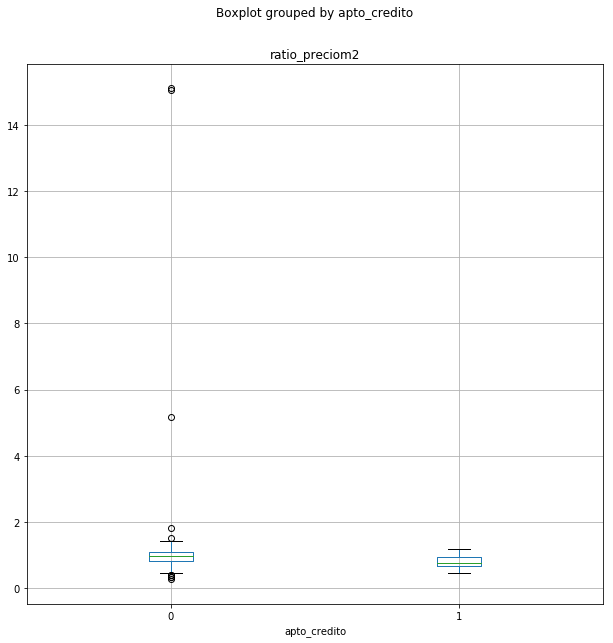

In [241]:
dfprop[dfprop['district_name'] == 'Villa Luro'].boxplot(column = 'ratio_preciom2', by = 'apto_credito', figsize = (10,10))


In [254]:
dfprop_districtprice = dfprop[dfprop['state_name']=='Capital Federal'].groupby(by = ["district_name"])["price_usd_per_m2"].agg(['mean', 'std'])

In [255]:
dfprop_districtprice['district'] = dfprop_districtprice.index
dfprop_districtprice

,mean,std,district
district_name,,,
Abasto,2057.529147,551.400794,Abasto
Agronomía,2088.124134,465.567568,Agronomía
Almagro,2749.102521,3262.402046,Almagro
Balvanera,1982.249390,916.104947,Balvanera
Barracas,1969.946866,1608.987186,Barracas
Barrio Norte,3098.248857,1177.912480,Barrio Norte
Belgrano,3153.981976,1112.706621,Belgrano
Boca,2068.168061,3046.694643,Boca
Boedo,10697.513056,13188.768866,Boedo


In [268]:
avgprices = dfprop_districtprice['mean'].to_dict()


<class 'dict'>


In [270]:
avgprices['Villa Urquiza']

2495.2882647353576

In [271]:
def district_avgprice (dist):
    return avgprices[str(dist)]

In [272]:
dfprop_caba = dfprop[dfprop['state_name']=='Capital Federal']

In [279]:
lista_medias = []
for i in range(len(dfprop_caba)):
    lista_medias.append(district_avgprice(str(dfprop_caba.iloc[i].district_name)))

In [290]:
dfprop_caba['media_preciom2'] = lista_medias

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [307]:
lista_ratio = []
for i in range(len(dfprop_caba)):
    lista_ratio.append(dfprop_caba.price_usd_per_m2.iloc[i] / dfprop_caba.media_preciom2.iloc[1])
lista_ratio

[0.7262185275701755,
 0.8433505481460102,
 nan,
 1.9756267470457456,
 1.9326783395012734,
 1.4392011368152815,
 2.268596241366971,
 1.0997860074781056,
 2.1680686500815565,
 1.476806471285578,
 1.1236501973844613,
 1.1676598301153527,
 1.405584246910017,
 0.5636978490212047,
 1.0965550862418572,
 0.7030245282577383,
 1.4172974489676005,
 1.0984055229498904,
 1.7530108346068958,
 1.7718604134736367,
 5.368550943059093,
 0.9939488603149406,
 2.229022351558135,
 1.2358969381547615,
 nan,
 1.4160089967412663,
 nan,
 nan,
 0.23567938640029412,
 nan,
 nan,
 nan,
 nan,
 0.6607447314534268,
 1.2490098112423194,
 0.8455467735318071,
 1.8451136250902123,
 1.13199731313646,
 1.0541881851825128,
 2.2263696557980355,
 2.7125310028088045,
 nan,
 1.4092446225530117,
 2.214527264011876,
 nan,
 1.2103642126169591,
 2.2859636273670976,
 2.2211329158244224,
 2.2211329158244224,
 0.9812059262083385,
 nan,
 2.2352693926555127,
 1.9326783395012734,
 2.0912051841025994,
 1.8077375175537163,
 1.81443430607187

In [321]:
dfprop_caba = dfprop_caba.drop(labels = 'ratio_preciom2', axis = 1)

In [324]:
dfprop_caba[dfprop_caba['ratio_usd_per_m2'] > 15][['price','price_usd_per_m2','media_preciom2', 'ratio_usd_per_m2']]

,price,price_usd_per_m2,media_preciom2,ratio_usd_per_m2
8924,250000.0,25000.000000,2538.664427,16.105653
21531,330000.0,33000.000000,3392.858919,21.259462
25000,1250000.0,31250.000000,2555.625344,20.132066
25012,1202000.0,32486.486486,10697.513056,20.928643
25016,1324000.0,35783.783784,2170.858377,23.052848
25031,1228700.0,24574.000000,3420.416576,15.831213
25113,2003000.0,34534.482759,10697.513056,22.248016
25119,1744000.0,35591.836735,2538.664427,22.929191
25159,1419000.0,29562.500000,1969.946866,19.044934
25694,865200.0,34608.000000,10697.513056,22.295377


In [327]:
dfprop_caba = dfprop_caba[dfprop_caba['ratio_usd_per_m2']<15]

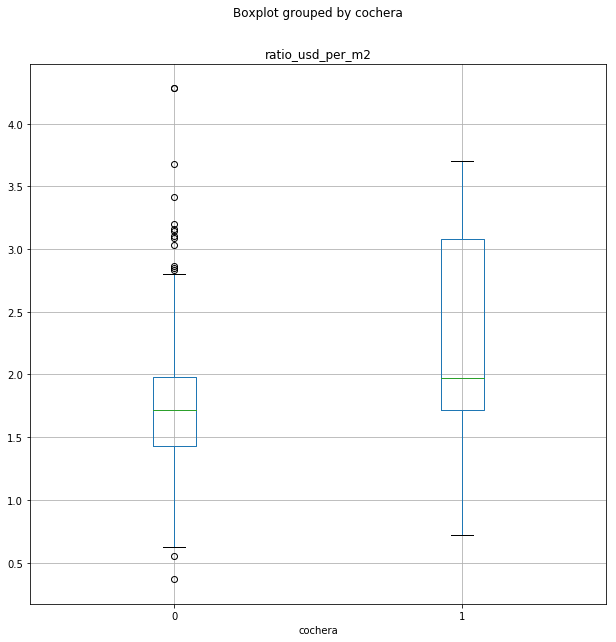

In [333]:
dfprop_caba[dfprop_caba['district_name'] == 'Retiro'].boxplot(column = 'ratio_usd_per_m2', by = ('cochera'), figsize = (10,10))